Variational AutoEncoder (VAE) with MNIST
========================================
---
Formation Introduction au Deep Learning  (FIDLE) - S. Arias, E. Maldonado, JL. Parouty - CNRS/SARI/DEVLOG - 2020  

## Episode 2 - Analyse our trained model
 - Load a saved model
 - Reconstruct some images
 - Latent space visualization
 - Matrix of generated images


## Step 1 - Init python stuff

In [1]:
import numpy as np
import scipy.stats
import sys, importlib

import matplotlib
import matplotlib.pyplot as plt

import modules.vae
import modules.data
importlib.reload(modules.data)
importlib.reload(modules.vae)
from modules.vae  import VariationalAutoencoder
from modules.data import load_MNIST

sys.path.append('..')
import fidle.pwk as ooo
importlib.reload(ooo)

ooo.init()

VariationalAutoencoder.about()


FIDLE 2020 - Practical Work Module
Version              : 0.2.6
Run time             : Thursday 6 February 2020, 22:04:25
Matplotlib style     : ../fidle/talk.mplstyle
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf

FIDLE 2020 - Variational AutoEncoder (VAE)
TensorFlow version   : 2.0.0
VAE version          : 1.24


## Step 2 - Get data

In [2]:
(x_train, y_train), (x_test, y_test) = load_MNIST()

Dataset loaded.
Resized and normalized.
x_train shape : (60000, 28, 28, 1)
x_test_shape  : (10000, 28, 28, 1)


## Step 3 - Load best model

In [3]:
tag = '000'

vae=modules.vae.VariationalAutoencoder.load(tag, config='vae_config.json', weights='best_model.h5')

Model initialized.
Outputs will be in  : ./run/000
Weights loaded from : ./run/000/models/best_model.h5


## Step 4 - Image reconstruction

In [4]:
z_points       = vae.encoder.predict(x_test)

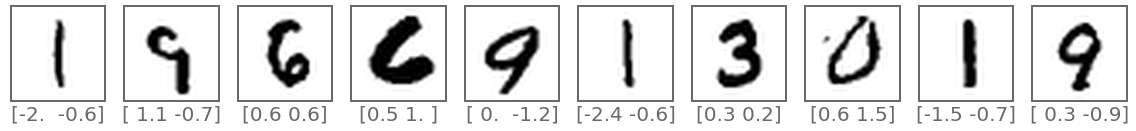

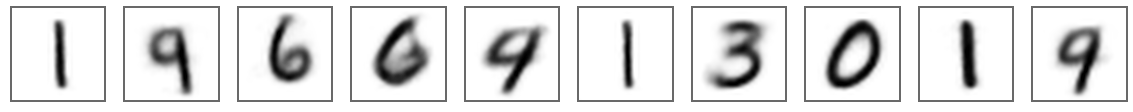

In [5]:
n_show = 10

# ---- Let's randomly select a few images

i_show = np.random.choice(range(len(x_test)), n_show)
x_show = x_test[i_show]

# ---- Get latent points and reconstructed images

z_points  = vae.encoder.predict(x_show)
x_reconst = vae.decoder.predict(z_points)

# ---- Just show it

labels=[ str(np.round(z_points[i],1)) for i in range(n_show) ]
ooo.plot_images(x_show,    labels, indices='all', columns=10, x_size=2,y_size=2)
ooo.plot_images(x_reconst, None  , indices='all', columns=10, x_size=2,y_size=2)


## Step 5 - Latent space

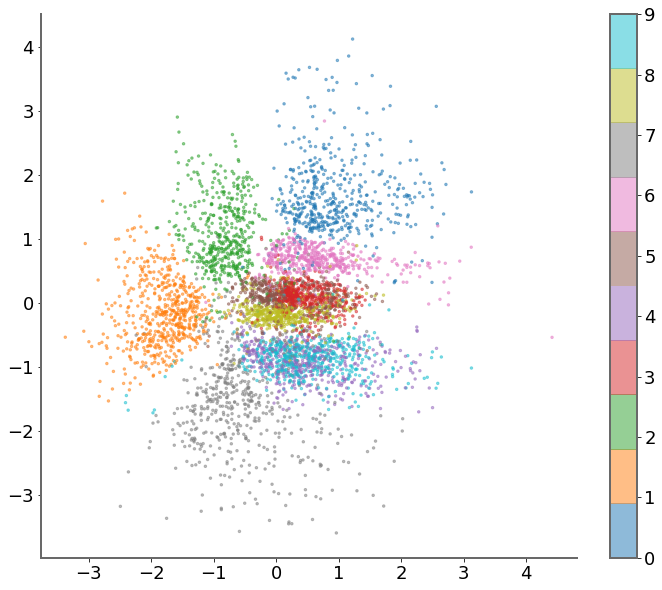

In [6]:
n_show = 5000

# ---- Let's randomly select some images

i_show = np.random.choice(range(len(x_test)), n_show)
x_show = x_test[i_show]
y_show = y_test[i_show]

# ---- Get latent points

z_points = vae.encoder.predict(x_show)

fig = plt.figure(figsize=(12, 10))
plt.scatter(z_points[:, 0] , z_points[:, 1], c=y_show, cmap= 'tab10', alpha=0.5, s=6)
plt.colorbar()
plt.show()

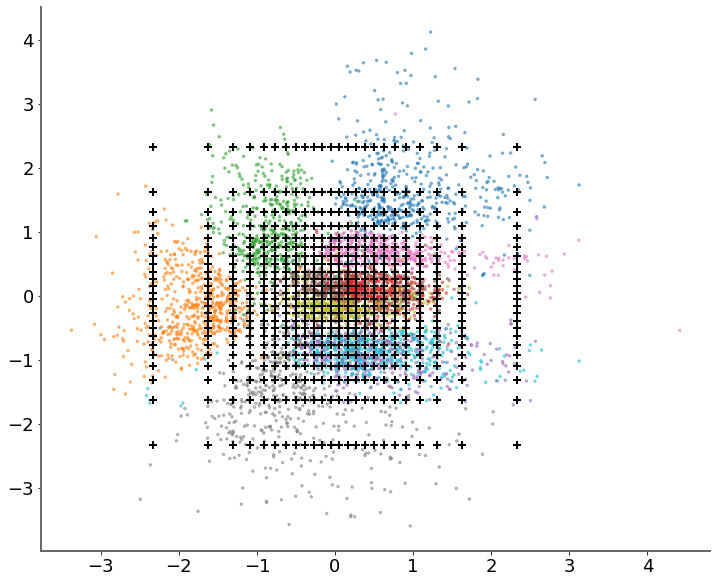

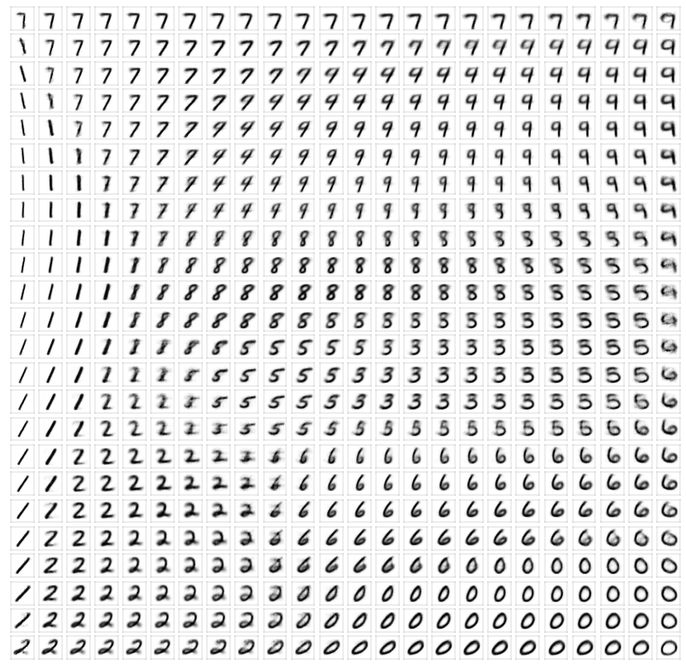

In [7]:
grid_size=24
importlib.reload(ooo)
# ---- Draw a ppf grid
#
grid=[]
for y in scipy.stats.norm.ppf(np.linspace(0.01, 0.99, grid_size)):
    for x in scipy.stats.norm.ppf(np.linspace(0.01, 0.99, grid_size)):
        grid.append( (x,y) )
grid=np.array(grid)

# ---- Draw latentspoints and grid

fig = plt.figure(figsize=(12, 10))
plt.scatter(z_points[:, 0] , z_points[:, 1], c=y_show, cmap= 'tab10', alpha=0.5, s=6)
plt.scatter(grid[:, 0] , grid[:, 1], c = 'black', s=60, linewidth=2, marker='+', alpha=1)
plt.show()

# ---- Plot grid corresponding images

x_reconst = vae.decoder.predict([grid])
ooo.plot_images(x_reconst, indices='all', columns=grid_size, x_size=0.5,y_size=0.5, y_padding=0,spines_alpha=0.1)


----
That's all folks !